# Introduction to NumPy

In this notebook, we are having a look at the basic functionalities of __numpy__ and __matplotlib__, two useful python libraries which we are going to use throughout the whole course.

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import time

# NumPy

NumPy is the fundamental package for scientific computing with Python. We will be using the `array` datatype from NumPy, which is a powerful N-dimensional object. By embedding our data into the NumPy data `array` we can make use of its powerful linear algebra functionality.

## Arrays ... and matrices

A NumPy array is a grid of values (all of the same type, i.e. int, float, str). The array is indexed by a touple of nonnegative integers. The array `ndim` (matrix rank) is the dimensions of the array and the `shape` is a tuple of integers giving the size of the array along each dimension. `np.array` is used to create a object of the type `np.ndarray`.

The `matrix` class in NumPy is a subclass of `ndarray`. It is **NOT** recommended to use this class anymore. Instead use a `ndarray` from the `np.array` class. 

In [159]:
a = np.array([[1, 2], [3, 4]])
print(a.shape)
print(a.ndim)
a

(2, 2)
2


array([[1, 2],
       [3, 4]])

### ATTENTION!!!
The multiplication operator `*` in NumPy performs an elemt-wise multiplication.

In [160]:
a*a

array([[ 1,  4],
       [ 9, 16]])

In [161]:
np.multiply(a,a)

array([[ 1,  4],
       [ 9, 16]])

Arrays of different dimensions can therefore NOT be multiplied.

In [163]:
b = np.array([[1,2,3],[4,5,6]])
a*b # Error

ValueError: operands could not be broadcast together with shapes (2,2) (2,3) 

To perform matrix multiplication use `np.matmul` or its syntactic sugar version `@`.

In [164]:
np.matmul(a,b)

array([[ 9, 12, 15],
       [19, 26, 33]])

In [165]:
a @ b

array([[ 9, 12, 15],
       [19, 26, 33]])

EXTRA: For 2-D arrays, the `np.dot` operator will do the same as the `np.matmul` operator.

In [166]:
np.dot(a,b)

array([[ 9, 12, 15],
       [19, 26, 33]])

In [167]:
v1 = np.array([1,2,3])
v2 = np.array([3,2,1])

Just as for matrixes, the multiplication operator does element-wise multiplication.

In [168]:
v1 * v2

array([3, 4, 3])

For the inner product, use the `dot` operator

In [169]:
np.dot(v1, v2)

10

Note the dimension of a vector is (2,)

In [170]:
v1.shape

(3,)

For some applications you will need to also have the second dimension (1) of the vector, this can easily be fixed

In [171]:
v1_ = v1[:,None]
v1_.shape

(3, 1)

Or alternatively reshape the vector

In [172]:
v1__ = v1.reshape(v1.shape[0], 1)
v1__.shape

(3, 1)

To create arrays of a certain size, we can initialize with `np.zeros` or `np.ones`.

In [173]:
z = np.zeros((2,3))
print(z.shape)
z

(2, 3)


array([[0., 0., 0.],
       [0., 0., 0.]])

Be aware that in contrary to matlab, np.zeros(n) gives you a vector instead of a matrix. If you want an $(n \times n)$-matrix, you have to type np.zeros((n, n)).

In [174]:
zv = np.zeros(4)
print(zv.shape)
print(zv)
zv = zv[:,None]
print(zv.shape)
print(zv)

(4,)
[0. 0. 0. 0.]
(4, 1)
[[0.]
 [0.]
 [0.]
 [0.]]


You can extract entries, rows or columns from both arrays and matrices by using the :-notation, similar to matlab. **Remark that python counts from 0, not from 1!**. Moreover, the index after the dot is not taken anymore.

 You can access the last row or column by the index -1. Moreover, R[i, :] and R[:, j] delivers you an (n,)-vector if R is of type array. For matrices, it delivers an (1, n) resp. and (n, 1)-matrix.

In [175]:
# Initialize an array with values from 1 to n
nums = 25
r = 5
d = np.linspace(1, nums, num=nums)
d = d.reshape((r,int(nums/r)))
print(d.shape)
d

(5, 5)


array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25.]])

In [176]:
# Matlab Notation for extracting the central 3x3 matrix out of a 5x5 matrix:
# A = np.zeros(5)
# A = A(2:4, 2:4)
#
# Python Notation:
Z = d[1:4, 1:4]
print(Z.shape)
Z

(3, 3)


array([[ 7.,  8.,  9.],
       [12., 13., 14.],
       [17., 18., 19.]])

### Reshaping

Some functions can not evaluate data given as matrices. For example, if you want to optimize a function after a matrix with scipy.optimize, the matrix must be reshaped into an (n,)-vector in order to run the optimization. Another application of reshaping is displaying images. This can easily be done by np.reshape. __BUT__: the dimensions must somehow agree!

In [177]:
print(d)
d_vec = np.reshape(np.array(d), (d.size,))
print(d_vec)
print(np.shape(d_vec))
dim = int(np.sqrt(np.shape(d_vec)[0]))
np.reshape(d_vec, (dim, dim))

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25.]]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]
(25,)


array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25.]])

In [178]:
d_vec = np.reshape(d, (d.size,))
print(d_vec)
print(np.shape(d_vec))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]
(25,)


### Appending

Sometimes, two vectors must be rowed below each other or next to each other. This can be done by np.append. Make sure to save your appended arrays if you still need them! Moreover, the dimensions must, again, agree.

In [179]:
m1 = np.ones((3,2))
m2 = np.zeros((3,2))
print(np.append(m1, m2, axis=0))
print(np.append(m1, m2, axis=1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]]


### Functions Applied to Arrays

We will define a very easy function and see what happens if we apply it to arrays.
Note the error with a standard datatype such as `list`. To use a list, we would need to loop over each item in the list and apply the function to it.

In [187]:
def make_odd(x):
    return 2*x + 1

v_std = [i for i in range(10)]

v_col = np.array(v_std)
print(type(v_col))
print(v_col.shape)
v_row = np.reshape(v_col, (1,10))
print(v_row.shape)
print("Input")
print(v_col)
print("Odd output")
print(make_odd(v_col))
print(make_odd(v_row))
print(make_odd(np.transpose(v_row)))

tmp = []
for i in v_std:
    tmp.append(make_odd(i))
print("Using a standard data type in python requires element wise call to the function")
print(tmp)
print("Error if using standard python data types")
make_odd(v_std) # Error

<class 'numpy.ndarray'>
(10,)
(1, 10)
Input
[0 1 2 3 4 5 6 7 8 9]
Odd output
[ 1  3  5  7  9 11 13 15 17 19]
[[ 1  3  5  7  9 11 13 15 17 19]]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]]
Using a standard data type in python requires element wise call to the function
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
Error if using standard python data types


TypeError: can only concatenate list (not "int") to list

## Time Comparison to for-Loops

Assume that we have a data matrix $X$ of shape $(d \times n)$, i.e. $n$ datapoints of dimension $d$. For some reason, we are interested in the $(d \times d)$-matrix
$$ A = \sum_{i = 1}^n i^2 \cdot \mathbf{x}_i \mathbf{x}_i^T.$$
We are going to calculate it with a for loop and as the matrix product
$$ (\mathbf{x}_1, \mathbf{x}_2, \cdots,  \mathbf{x}_n) \cdot \begin{pmatrix}
1 &   &   &  \\
  & 4 &   &  \\
  &   & \ddots&\\
  &   &   & n^2\\
\end{pmatrix}
\cdot \begin{pmatrix}
\mathbf{x}_1^T\\
\mathbf{x}_2^T\\
\vdots\\
\mathbf{x}_n^T
\end{pmatrix}$$

Getting the matrix $\mathbf{x}_i \mathbf{x}_i^T$ can be achieved by using *np.outer*.

We will store the time and later plot it. For matters of simplicity, we will once fix the dimension and once the number of samples.

In [188]:
# fixed dimension:
d = 20

times_for_fixed_d = []
times_vec_fixed_d = []
err = 0

for n in range(20, 1000, 20):
    # for loop
    X = np.random.random((d, n))
    tic = time.process_time()
    A_for = np.zeros((d, d))
    for i in range(n):
        A_for += (i+1)**2 * np.outer(X[:, i], X[:, i])
    toc = time.process_time()
    times_for_fixed_d.append(toc-tic)
    
    # matrix-vector product
    tic = time.process_time()
    D = np.diag(np.arange(1, n+1)**2)
    A_vec = np.matmul(X, np.matmul(D, np.transpose(X)))
    toc = time.process_time()
    times_vec_fixed_d.append(toc-tic)
    
    err += np.linalg.norm(A_for - A_vec)
    
# check whether the results are the same
print('Mean Error = ', err/49)

Mean Error =  2.2791971268920867e-07


In [189]:
# fixed dataset size
n = 1000

times_for_fixed_n = []
times_vec_fixed_n = []
err = 0

for d in range(1, 30):
    # for loop
    X = np.random.random((d, n))
    tic = time.process_time()
    A_for = np.zeros((d, d))
    for i in range(n):
        A_for += (i+1)**2 * np.outer(X[:, i], X[:, i])
    toc = time.process_time()
    times_for_fixed_n.append(toc-tic)
    
    # matrix-vector product
    tic = time.process_time()
    D = np.diag(np.arange(1, n+1)**2)
    A_vec = np.matmul(X, np.matmul(D, np.transpose(X)))
    toc = time.process_time()
    times_vec_fixed_n.append(toc-tic)
    
    err += np.linalg.norm(A_for - A_vec)
    
# check wheter the results are the same
print('Mean Error = ', err/29)

Mean Error =  8.002213682395533e-07


We are going to consider them below in a plot.

## Plotting

We will create a basic matplotlib plot by comparing the times used for both methods before.

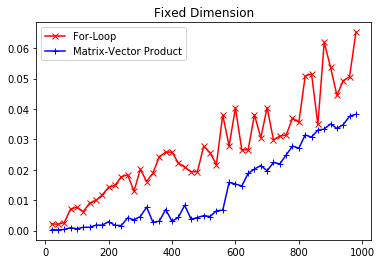

In [190]:
x_fixed_d = [n for n in range(20, 1000, 20)]
plt.plot(x_fixed_d, times_for_fixed_d, 'r-x')
plt.plot(x_fixed_d, times_vec_fixed_d, 'b-+')
plt.title('Fixed Dimension')
plt.legend(['For-Loop', 'Matrix-Vector Product'], loc='upper left')
plt.show()

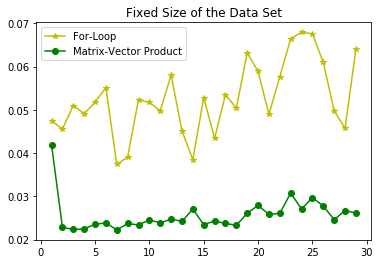

In [191]:
x_fixed_n = [d for d in range(1, 30)]
plt.plot(x_fixed_n, times_for_fixed_n, 'y-*')
plt.plot(x_fixed_n, times_vec_fixed_n, 'g-o')
plt.title('Fixed Size of the Data Set')
plt.legend(['For-Loop', 'Matrix-Vector Product'], loc='upper left')
plt.show()

**Note that this was only one loop. In case of two or even more nested loops, the computational load using for-loops will grow even faster!**.

### Displaying Images

When displaying images, it important to specify how an image is structured. If we want to print an image that is given in greyscale, we have to specify this over the cmap. The block below generates a chess board and plots it. Remark that there are different ways of displaying an image two "obviously" identical cmaps do not have to be identical! Do you spot the difference between the cmaps 'Greys' and 'gray'?

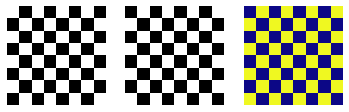

In [192]:
img = np.ones((256, 256))
for i in range(256):
    for j in range(256):
        if (i//32)%2 == (j//32)%2:
            img[i, j] = 0

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='Greys')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img, cmap='plasma')
plt.axis('off')
plt.show()

If we want an image that is coloured, we have to speficy this in a 3-dimensional array representing the three colours red, green and blue. The block below generates an image consisting of alterning colour columns. Note that we do not have to specify a colourmap below.

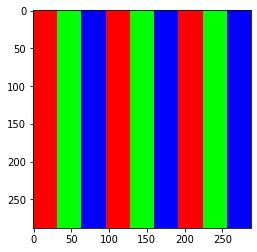

In [193]:
imgc = np.zeros((288, 288, 3))

for j in range(288):
    imgc[:, j, (j//32)%3] = 1

plt.imshow(imgc)
plt.show()

### Example help for exercise 2
In the exercises we will often work with objects instanciated from a class. A *Gaussian Mixture Model* is simply a list of *Multivariate normal distributions* as shown in the example below:

In [194]:
class MVND:
    def __init__(self, name, data, p=1.0):
        self.name = name
        self.p = p
        self.data = data
        self.sum = np.sum(data)
        
    def prettyPrintString(self):
        print('MVND with name {} has sum: {}'.format(self.name, self.sum))

In [195]:
# create a list of objects
gmms = []
gmms.append(MVND('MyMVND1', [1,2,3]))
gmms.append(MVND('MyMVND2', [3,4,5]))
for gmm in gmms:
    print(gmm.name, gmm.sum)
    
for gmm in gmms:
    gmm.prettyPrintString()

MyMVND1 6
MyMVND2 12
MVND with name MyMVND1 has sum: 6
MVND with name MyMVND2 has sum: 12
